In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return 3 * x ** 2

Параметры градиентного спуска

In [3]:
x0 = 5 #начальное значение х
λ = 0.1 #скорость продвижения по функции
ε = 1e-8 #погрешность
res = []

Реализация метода градиентного спуска для 1-ой переменной.

In [4]:
def df(x):
  ε = 1e-8  # Малое значение для вычисления градиента
  return np.gradient(f(np.array([x - ε, x + ε])), 2 * ε)[0]

#градиентный спуск
while True:
  res.append((x0, f(x0)))
  x1 = x0 - λ * df(x0)
  if abs(x0 - x1) < 1e-8:
    break
  x0 = x1

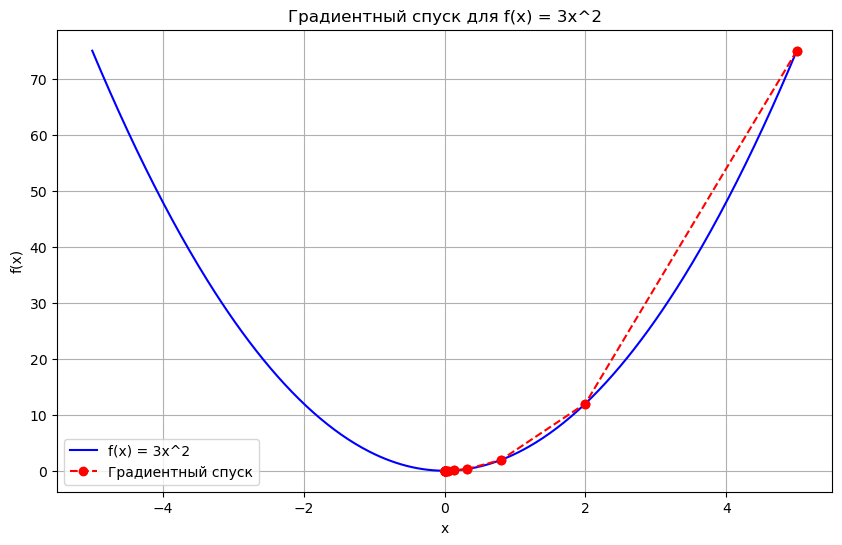

In [6]:
#преобразуем результаты в массивы для построения графика
res_x, res_y = zip(*res)

x_vals_plot = np.linspace(-5, 5, 400)  
y_vals_plot = f(x_vals_plot) 

plt.figure(figsize=(10, 6))
plt.plot(x_vals_plot, y_vals_plot, label="f(x) = 3x^2", color="blue")  
plt.plot(res_x, res_y, color="red", marker="o", linestyle="--", label="Градиентный спуск") #траектория градиентного спуска
plt.scatter(res_x, res_y, color="red") #точки на траектории
plt.title("Градиентный спуск для f(x) = 3x^2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

Реализация метода градиентного спуска для 2-х переменных

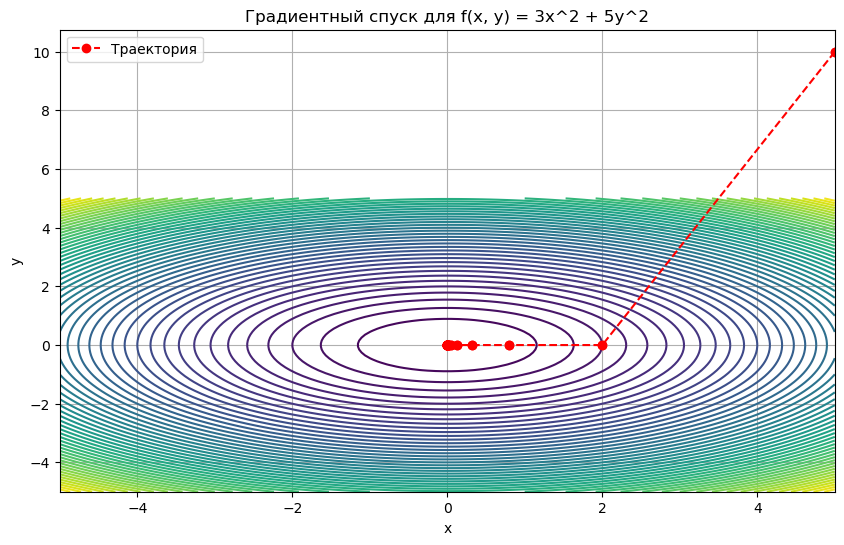

Минимум достигнут в точке: [8.79609302e-09 4.21862112e-22]


In [11]:
#определяем функцию
def f(x):
    return 3 * x[0]**2 + 5 * x[1]**2

#вычисляем градиент
def compute_gradient(f, x, ε=1e-5):
    grad = np.zeros_like(x)
    for i in range(len(x)):
        x_plus = x.copy()
        x_minus = x.copy()
        x_plus[i] += ε  #прибавляем ε к i-й координате
        x_minus[i] -= ε  #вычитаем ε из i-й координаты
        grad[i] = (f(x_plus) - f(x_minus)) / (2 * ε)  #центральная разность
    return grad

#параметры
x0 = np.array([5.0, 10.0])  #начальная точка
λ = 0.1  
ε = 1e-8 
res = [] 

#градиентный спуск
while True:
    res.append(np.append(x0, f(x0)))  #сохраняем текущую точку и значение функции
    gradient = compute_gradient(f, x0)  #вычисляем градиент
    x1 = x0 - λ * gradient  #обновляем координаты
    if np.linalg.norm(x1 - x0) < ε:  #проверяем условие остановки
        break
    x0 = x1  #переходим к новой точке

#преобразуем результаты в массивы для построения графика
res = np.array(res)
res_x, res_y, res_z = res[:, 0], res[:, 1], res[:, 2]

x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f([X, Y])

plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=50, cmap='viridis')  #контурный график функции
plt.plot(res_x, res_y, color="red", marker="o", linestyle="--", label="Траектория")  #траектория спуска
plt.scatter(res_x, res_y, color="red")  #точки на траектории
plt.title("Градиентный спуск для f(x, y) = 3x^2 + 5y^2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

print("Минимум достигнут в точке:", x0)

Метод наискорейшего спуска

In [13]:
from scipy.optimize import minimize_scalar  #для одномерной оптимизации

def f(x):
    return 3 * x[0]**2 + 5 * x[1]**2

#вычисление градиента
def compute_gradient(f, x, ε=1e-5):
    grad = np.zeros_like(x)
    for i in range(len(x)):
        x_plus = x.copy()
        x_minus = x.copy()
        x_plus[i] += ε
        x_minus[i] -= ε
        grad[i] = (f(x_plus) - f(x_minus)) / (2 * ε)
    return grad

#метод наискорейшего спуска
def steepest_descent(f, x0, ε=1e-8, max_iter=1000):
    x = np.array(x0, dtype=float)
    res = [x.copy()]  #сохраняем траекторию
    for i in range(max_iter):
        gradient = compute_gradient(f, x)  #вычисляем градиент
        if np.linalg.norm(gradient) < ε:  #проверяем условие остановки
            break
        
        #одномерная оптимизация для выбора оптимального шага λ
        def line_search_func(λ):
            return f(x - λ * gradient)
        
        result = minimize_scalar(line_search_func, bounds=(0, 1), method='bounded')
        lambda_opt = result.x  #оптимальный шаг
        
        x = x - lambda_opt * gradient  #обновляем координаты
        res.append(x.copy())  #сохраняем текущую точку
    
    return np.array(res)

In [14]:
#начальная точка и параметры
x0 = np.array([5.0, 10.0])
ε = 1e-8

#запуск метода наискорейшего спуска
trajectory = steepest_descent(f, x0, ε)

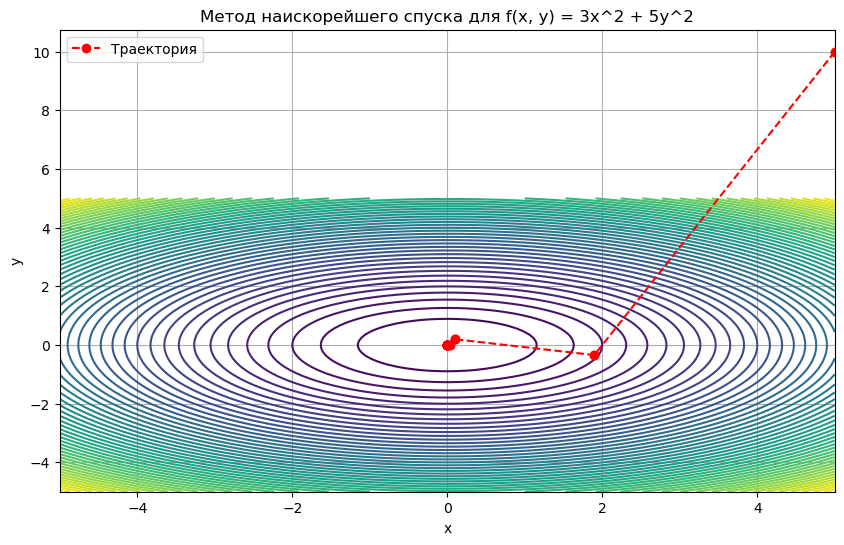

Минимум достигнут в точке: [3.01305283e-10 6.02610567e-10]


In [15]:
#построение графиков
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f([X, Y])

plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=50, cmap='viridis')  #контурный график функции
plt.plot(trajectory[:, 0], trajectory[:, 1], color="red", marker="o", linestyle="--", label="Траектория")  #траектория спуска
plt.scatter(trajectory[:, 0], trajectory[:, 1], color="red")  #точки на траектории
plt.title("Метод наискорейшего спуска для f(x, y) = 3x^2 + 5y^2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

#вывод результата
print("Минимум достигнут в точке:", trajectory[-1])